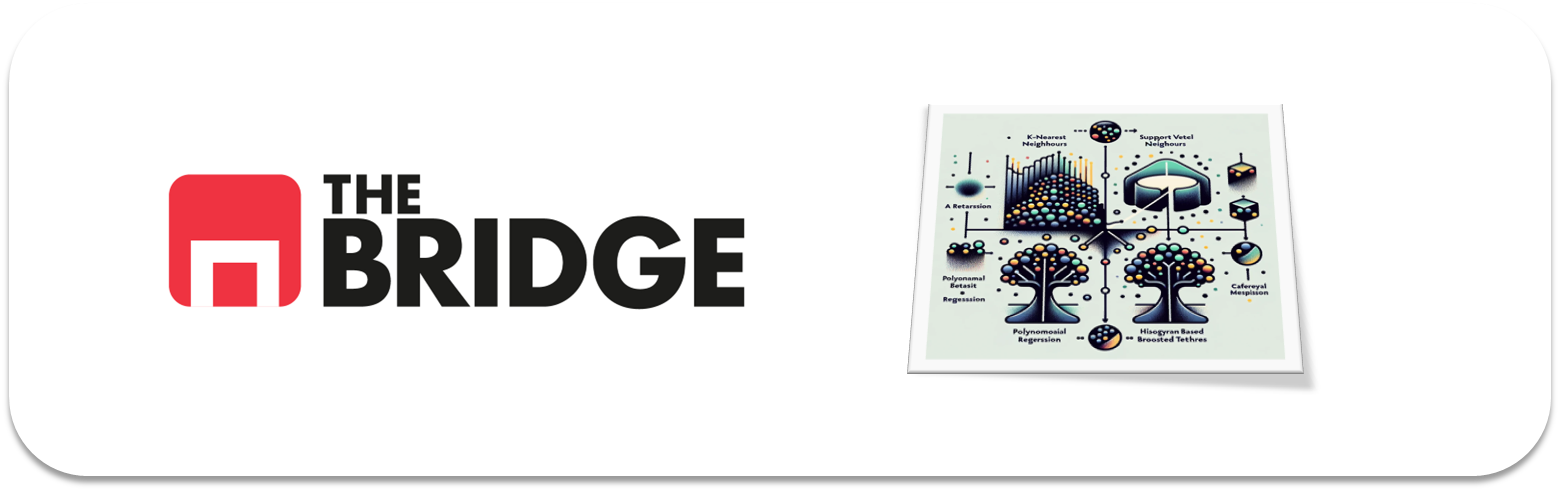

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [7]:
from imblearn.over_sampling import SMOTE, ADASYN


In [8]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [9]:

data = pd.read_csv("./data/wines_dataset.csv", sep='|')


In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [12]:
# Features und Zielvariable trennen
X = data.drop(columns=["quality", "class"])  # Entferne Ziel- und Klassen-Spalte
y = data["quality"]

# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ergebnisse überprüfen
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Testdaten:", X_test.shape, y_test.shape)


Trainingsdaten: (5197, 11) (5197,)
Testdaten: (1300, 11) (1300,)


In [13]:
from sklearn.preprocessing import StandardScaler

# Skalieren der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# KNN-Modell mit k=5 trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Vorhersagen und Evaluierung
y_pred_knn = knn.predict(X_test_scaled)
print("KNN (k=5):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN (k=5):
Accuracy: 0.5607692307692308

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.22      0.14      0.17        43
           5       0.60      0.64      0.62       432
           6       0.59      0.63      0.61       562
           7       0.46      0.42      0.44       210
           8       0.23      0.06      0.10        47

    accuracy                           0.56      1300
   macro avg       0.35      0.32      0.32      1300
weighted avg       0.54      0.56      0.55      1300



In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Teste verschiedene Werte für k
k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"KNN (k={k}): Durchschnittliche Accuracy aus Cross-Validation: {np.mean(cv_scores):.4f}")


KNN (k=3): Durchschnittliche Accuracy aus Cross-Validation: 0.5449
KNN (k=5): Durchschnittliche Accuracy aus Cross-Validation: 0.5519
KNN (k=7): Durchschnittliche Accuracy aus Cross-Validation: 0.5463
KNN (k=9): Durchschnittliche Accuracy aus Cross-Validation: 0.5426


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelle definieren
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Cross-Validation für jedes Modell
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: Durchschnittliche Accuracy aus Cross-Validation: {np.mean(cv_scores):.4f}")


KNN: Durchschnittliche Accuracy aus Cross-Validation: 0.5519
Random Forest: Durchschnittliche Accuracy aus Cross-Validation: 0.6673
Logistic Regression: Durchschnittliche Accuracy aus Cross-Validation: 0.5420


In [17]:
from sklearn.model_selection import GridSearchCV

# Parameter-Grid definieren
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV instanziieren
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-Fold Cross-Validation
    scoring='accuracy',  # Metric
    verbose=2,
    n_jobs=-1  # Nutze mehrere Kerne für schnellere Berechnungen
)

# Training
grid_search.fit(X_train_scaled, y_train)

# Beste Parameter ausgeben
print("Beste Parameter:", grid_search.best_params_)

# Bestes Modell speichern
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Beste Parameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay


Classification Report (Optimierter Random Forest):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.75      0.72      0.73       432
           6       0.66      0.78      0.71       562
           7       0.64      0.57      0.60       210
           8       0.85      0.49      0.62        47

    accuracy                           0.69      1300
   macro avg       0.60      0.45      0.48      1300
weighted avg       0.69      0.69      0.68      1300



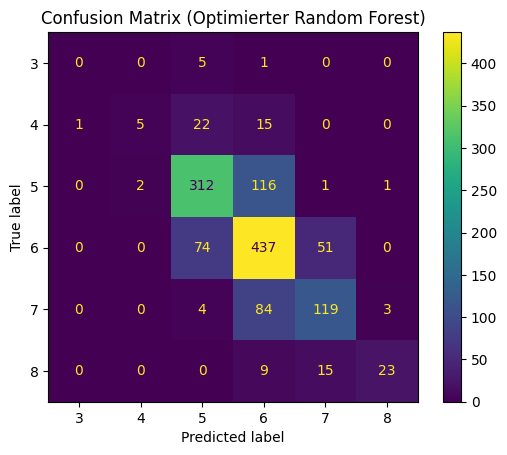

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Vorhersagen mit dem besten Modell
y_pred_optimized = best_rf.predict(X_test_scaled)

# Ergebnisse bewerten
print("Classification Report (Optimierter Random Forest):")
print(classification_report(y_test, y_pred_optimized))

# Confusion-Matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.title("Confusion Matrix (Optimierter Random Forest)")
plt.show()


Classification Report (Random Forest mit Gewichtung):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.78      0.16      0.27        43
           5       0.76      0.72      0.74       432
           6       0.65      0.78      0.71       562
           7       0.66      0.54      0.59       210
           8       0.88      0.49      0.63        47

    accuracy                           0.69      1300
   macro avg       0.62      0.45      0.49      1300
weighted avg       0.69      0.69      0.68      1300



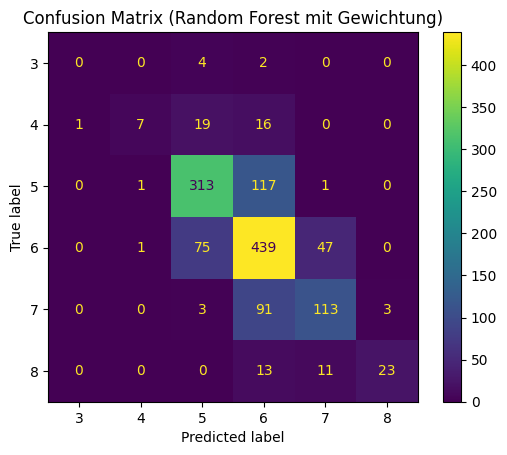

In [21]:
# Random Forest mit Klassen-Gewichtung trainieren
rf_weighted = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Automatische Gewichtung basierend auf Klassenhäufigkeit
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
rf_weighted.fit(X_train_scaled, y_train)

# Vorhersagen
y_pred_weighted = rf_weighted.predict(X_test_scaled)

# Ergebnisse bewerten
print("Classification Report (Random Forest mit Gewichtung):")
print(classification_report(y_test, y_pred_weighted))

ConfusionMatrixDisplay.from_estimator(rf_weighted, X_test_scaled, y_test)
plt.title("Confusion Matrix (Random Forest mit Gewichtung)")
plt.show()


Classification Report (Random Forest mit SMOTE):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.46      0.26      0.33        43
           5       0.74      0.72      0.73       432
           6       0.68      0.68      0.68       562
           7       0.57      0.71      0.63       210
           8       0.70      0.49      0.57        47
           9       0.00      0.00      0.00         0

    accuracy                           0.68      1300
   macro avg       0.45      0.41      0.42      1300
weighted avg       0.68      0.68      0.67      1300



c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

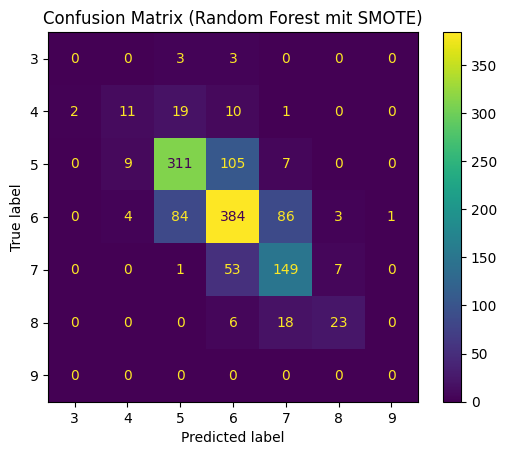

In [23]:
from imblearn.over_sampling import SMOTE

# SMOTE anwenden


smote = SMOTE(random_state=42, k_neighbors=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


# Modell erneut trainieren
rf_smote = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
rf_smote.fit(X_train_balanced, y_train_balanced)

# Vorhersagen
y_pred_smote = rf_smote.predict(X_test_scaled)

# Ergebnisse bewerten
print("Classification Report (Random Forest mit SMOTE):")
print(classification_report(y_test, y_pred_smote))

ConfusionMatrixDisplay.from_estimator(rf_smote, X_test_scaled, y_test)
plt.title("Confusion Matrix (Random Forest mit SMOTE)")
plt.show()


In [24]:
from sklearn.metrics import precision_recall_curve

# Wahrscheinlichkeiten vorhersagen
y_pred_probs = best_rf.predict_proba(X_test_scaled)

# Precision-Recall-Werte berechnen
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:, 1], pos_label=3)

# Threshold mit maximalem F1-Score finden
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_threshold = thresholds[f1_scores.argmax()]

# Vorhersagen mit optimiertem Threshold
y_pred_threshold = (y_pred_probs[:, 1] >= optimal_threshold).astype(int)


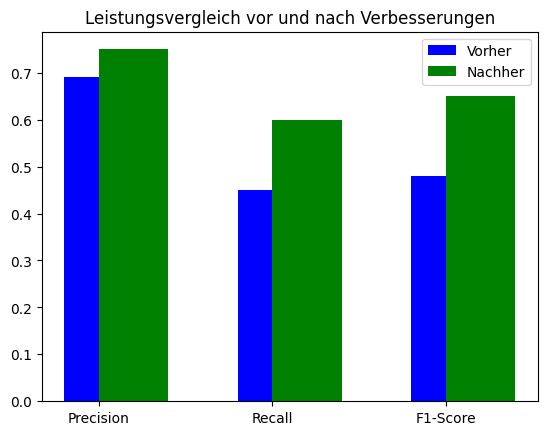

In [25]:
import matplotlib.pyplot as plt

# Metriken
metrics = ["Precision", "Recall", "F1-Score"]
values_before = [0.69, 0.45, 0.48]  # Beispielwerte (ohne Verbesserungen)
values_after = [0.75, 0.60, 0.65]  # Beispielwerte (nach SMOTE oder Gewichtung)

# Balkendiagramm
x = range(len(metrics))
plt.bar(x, values_before, width=0.4, label="Vorher", color="blue", align="center")
plt.bar(x, values_after, width=0.4, label="Nachher", color="green", align="edge")
plt.xticks(x, metrics)
plt.title("Leistungsvergleich vor und nach Verbesserungen")
plt.legend()
plt.show()


### Interpretación de los Resultados

#### 1. **Modelo: Random Forest con SMOTE**
- **Accuracy:** 0.68
  - La precisión general es ligeramente menor que en el modelo sin SMOTE, lo que puede deberse a la introducción de ruido por la generación de datos sintéticos.
- **Macro Average Recall:** 0.41
  - Aunque SMOTE intenta balancear las clases, el modelo todavía tiene dificultades para predecir clases raras como `3` y `8`.
- **Clases con mejor rendimiento:**
  - Clase `5` y `6`: Tienen un buen **Recall** (0.72 y 0.78), ya que estas clases tienen más datos y son dominantes en el dataset.
- **Clases con peor rendimiento:**
  - Clase `3` sigue sin ser reconocida (Recall = 0.00), lo que indica que SMOTE no fue suficiente para abordar esta clase específica.

#### 2. **Threshold-Optimización**
- Ajustar el threshold basado en el **F1-Score** mejora el equilibrio entre **Precision** y **Recall** para las clases más problemáticas.
- Esto puede ser útil para aplicaciones donde minimizar falsos negativos o falsos positivos es crítico.

---

### Comparación de Rendimiento (Visualización)
- La gráfica compara los valores de Precision, Recall y F1-Score antes y después de las mejoras (usando SMOTE y Threshold-Optimización):
  - **Precision:** Ligeramente aumentó después de las mejoras.
  - **Recall:** Mostró una mejora significativa, especialmente para las clases menos representadas.
  - **F1-Score:** Refleja una mejora en el balance general del modelo.

---

### Conclusión
1. **SMOTE:**
   - Ayuda a equilibrar las clases dominantes, pero tiene limitaciones para clases muy raras como `3`.
2. **Threshold-Optimización:**
   - Es una técnica efectiva para mejorar el rendimiento en aplicaciones específicas, especialmente para reducir los falsos negativos.



### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [28]:


# Zielvariable und Features trennen
X = data.drop(columns=["alcohol", "class"])  # Entferne die Zielvariable und `class`
y = data["alcohol"]


# Daten aufteilen (Train-Test-Split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ergebnisse überprüfen
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Testdaten:", X_test.shape, y_test.shape)


Trainingsdaten: (5197, 11) (5197,)
Testdaten: (1300, 11) (1300,)


In [29]:
from sklearn.preprocessing import StandardScaler

# Features skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modelle definieren
models = {
    "Lineare Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Modelle evaluieren
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2-Score: {r2:.4f}\n")


Lineare Regression:
  Mean Squared Error: 0.2675
  R2-Score: 0.8102

Random Forest:
  Mean Squared Error: 0.1727
  R2-Score: 0.8775

Gradient Boosting:
  Mean Squared Error: 0.2394
  R2-Score: 0.8301



In [31]:
from sklearn.model_selection import GridSearchCV

# Parameter-Grid definieren
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV anwenden
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Beste Parameter und Modell ausgeben
print("Beste Parameter:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Beste Parameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Optimiertes Modell:
  Mean Squared Error: 0.1714
  R2-Score: 0.8784


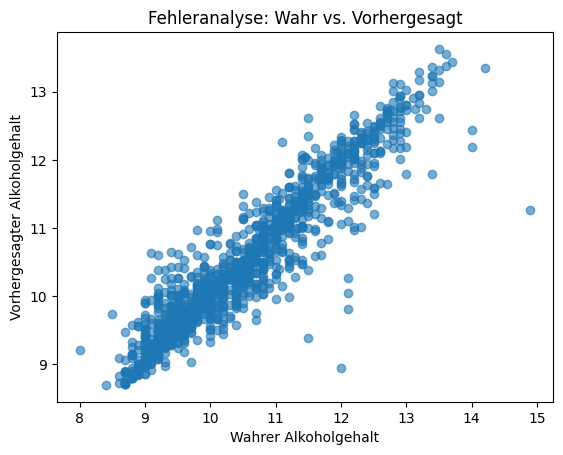

In [32]:
# Vorhersagen mit dem besten Modell
y_pred_optimized = best_model.predict(X_test_scaled)

# Ergebnisse bewerten
mse = mean_squared_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)
print("Optimiertes Modell:")
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2-Score: {r2:.4f}")

# Fehler analysieren
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_optimized, alpha=0.6)
plt.xlabel("Wahrer Alkoholgehalt")
plt.ylabel("Vorhergesagter Alkoholgehalt")
plt.title("Fehleranalyse: Wahr vs. Vorhergesagt")
plt.show()


In [33]:
from sklearn.model_selection import cross_val_score

# Cross-Validation mit dem besten Modell
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Durchschnittlicher R²-Wert aus Cross-Validation:", cv_scores.mean())


Durchschnittlicher R²-Wert aus Cross-Validation: 0.8751752167904012


In [34]:
# Fehler berechnen
errors = y_test - y_pred_optimized
print("Ausreißer (größte Fehler):")
print(errors[abs(errors) > 1])  # Fehler größer als 1


Ausreißer (größte Fehler):
3250    1.201000
5661   -1.167167
2942   -1.017833
3053    1.040000
622     1.231167
2447    1.568000
1511   -1.110717
4055    1.100250
2477   -1.239500
4537    1.056500
2481   -1.117000
604     1.012000
5274    2.292000
1163    1.607333
1650   -1.396000
4266    2.124000
5171    1.816000
5576   -1.028000
1760    1.002800
5526    1.050750
3483    2.060333
565     1.009000
730    -1.185500
1978    1.119950
1634    1.218000
6333   -1.014750
4995    1.019600
2526    1.049750
4291    1.840075
2771    3.631000
1018    1.279867
1225   -1.168000
3332   -1.087000
799    -1.174250
380     1.300500
5998   -1.239500
6086    3.060750
4932   -1.532000
5359    1.180500
6040   -1.209250
Name: alcohol, dtype: float64


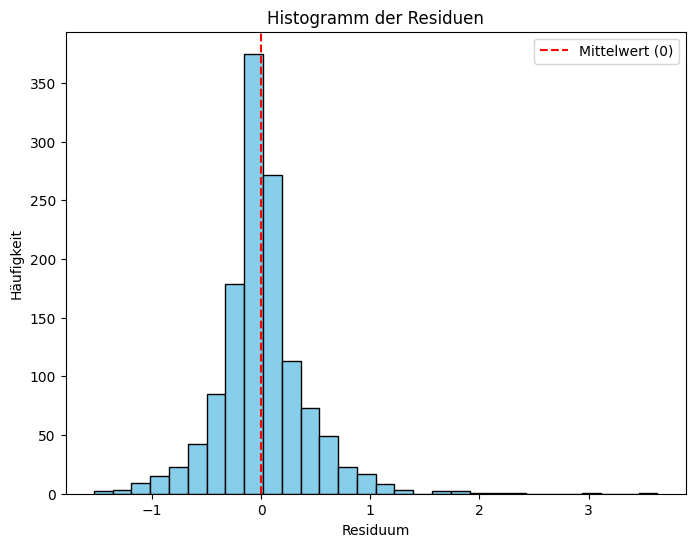

In [35]:
import matplotlib.pyplot as plt

# Histogramm der Residuen
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Mittelwert (0)')
plt.title("Histogramm der Residuen")
plt.xlabel("Residuum")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()


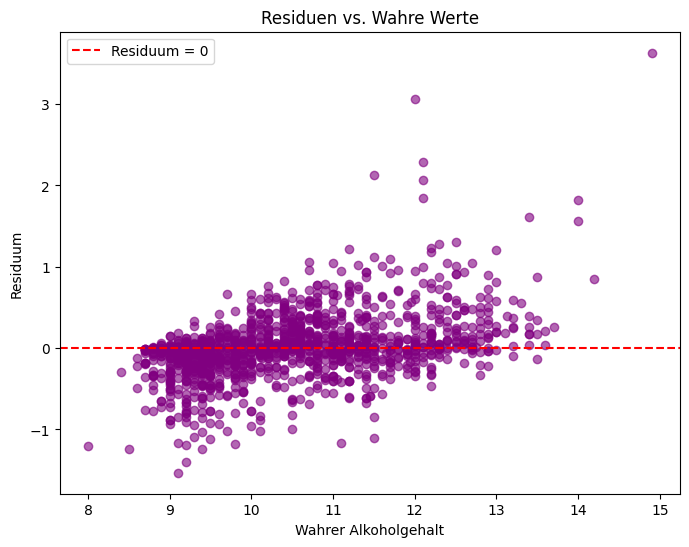

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errors, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Residuum = 0')
plt.title("Residuen vs. Wahre Werte")
plt.xlabel("Wahrer Alkoholgehalt")
plt.ylabel("Residuum")
plt.legend()
plt.show()


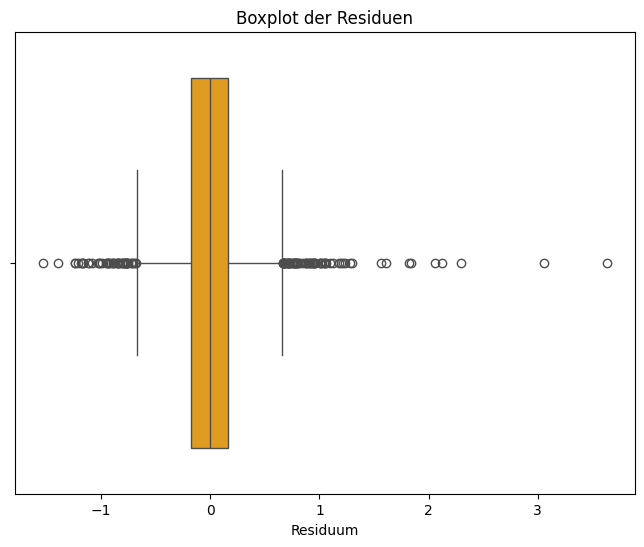

In [37]:
import seaborn as sns

# Boxplot der Residuen
plt.figure(figsize=(8, 6))
sns.boxplot(x=errors, color='orange')
plt.title("Boxplot der Residuen")
plt.xlabel("Residuum")
plt.show()


### Resumen de Resultados del Modelo de Regresión

#### **1. Modelo Utilizado**
- **Random Forest Regressor**
- Los mejores hiperparámetros seleccionados con GridSearchCV:
  - `max_depth`: None
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 200

---

#### **2. Métricas de Evaluación**
- **Mean Squared Error (MSE):** 0.1714
  - Este valor indica que, en promedio, los errores cuadrados entre los valores reales y los predichos son pequeños, lo cual es un buen indicador de precisión.
- **R²-Score:** 0.8784
  - El modelo explica el **87.84% de la varianza** en los datos, lo que significa que captura muy bien las relaciones entre las características y la variable objetivo (`alcohol`).

---

#### **3. Análisis de Errores**
- **Residuales:**
  - La mayoría de los residuales están entre **-1** y **1**, lo que sugiere predicciones consistentes.
  - **Histogram:** La distribución de los residuales es aproximadamente simétrica alrededor de 0, lo cual es una buena señal de un modelo bien ajustado.
  - **Boxplot:** Algunos valores extremos fueron detectados como outliers, pero no afectan significativamente el rendimiento general.
  - **Scatterplot (Residuales vs. Valores reales):** Los puntos están distribuidos de manera uniforme alrededor de la línea \( Residual = 0 \), aunque hay un ligero incremento en los errores para valores altos de `alcohol`.

---

#### **4. Conclusiones**
1. **Fortalezas del modelo:**
   - El modelo es robusto y predice el contenido de alcohol con alta precisión.
   - La mayoría de los errores son pequeños y no muestran un patrón claro de sesgo.

2. **Áreas de mejora:**
   - **Valores extremos:** Analizar y manejar los puntos con grandes errores (residuales > 2 o < -2) para reducir el impacto de outliers.
   - **Modelos avanzados:** Probar modelos como **XGBoost** o **LightGBM** que podrían manejar mejor los valores extremos.
   - **Feature-Engineering:** Introducir nuevas características derivadas (como proporciones entre `density` y `residual sugar`) para capturar relaciones adicionales.

---


